DATA ANALYSIS


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
 df = pd.read_csv("C:\\Users\\admin\\Downloads\\OneDrive\\python\\Datascience\\Sales Data.csv.ds.csv")


In [5]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [6]:
df.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [7]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df['Month'] = df['Order Date'].dt.month

In [9]:
print(f"Original data shape: {df.shape}")


Original data shape: (185950, 11)


In [10]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Print outlier information
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        print(f"Column {col}: {len(outliers)} outliers detected ({len(outliers)/len(df_clean)*100:.2f}%)")
        print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
        
        # Filter out outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

In [11]:
def remove_outliers_zscore(df, columns, threshold=3):
    df_clean = df.copy()
    
    for col in columns:
        z_scores = zscore(df_clean[col], nan_policy='omit')
        abs_z_scores = np.abs(z_scores)
        
        # Print outlier information
        outliers = df_clean[abs_z_scores > threshold]
        print(f"Column {col}: {len(outliers)} outliers detected using Z-score ({len(outliers)/len(df_clean)*100:.2f}%)")
        
        # Filter out outliers
        df_clean = df_clean[abs_z_scores <= threshold]
    
    return df_clean

In [12]:
def cap_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    
    df_clean = df.copy()
    
    for col in columns:
        lower_limit = df_clean[col].quantile(lower_percentile)
        upper_limit = df_clean[col].quantile(upper_percentile)
        
        # Print information
        lower_outliers = len(df_clean[df_clean[col] < lower_limit])
        upper_outliers = len(df_clean[df_clean[col] > upper_limit])
        print(f"Column {col}: Capping {lower_outliers} lower and {upper_outliers} upper outliers")
        
        # Cap values
        df_clean[col] = df_clean[col].clip(lower=lower_limit, upper=upper_limit)
    
    return df_clean

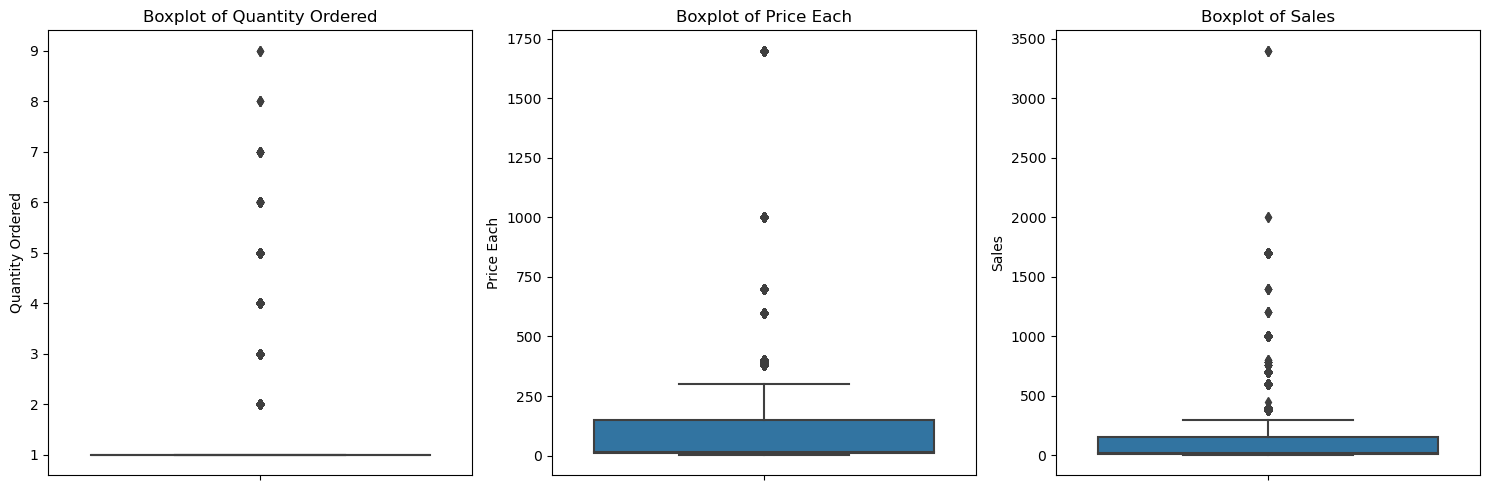

In [13]:
numeric_cols = ['Quantity Ordered', 'Price Each', 'Sales']

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [14]:
df_iqr = remove_outliers_iqr(df, numeric_cols)
print(f"Data shape after IQR outlier removal: {df_iqr.shape}")


Column Quantity Ordered: 17398 outliers detected (9.36%)
Lower bound: 1.0, Upper bound: 1.0
Column Price Each: 36952 outliers detected (21.92%)
Lower bound: -195.12500000000003, Upper bound: 357.07500000000005
Column Sales: 4781 outliers detected (3.63%)
Lower bound: -120.11, Upper bound: 232.05
Data shape after IQR outlier removal: (126819, 11)


In [15]:
df_zscore = remove_outliers_zscore(df, numeric_cols)
print(f"Data shape after Z-score outlier removal: {df_zscore.shape}")

Column Quantity Ordered: 4074 outliers detected using Z-score (2.19%)
Column Price Each: 4724 outliers detected using Z-score (2.60%)
Column Sales: 4142 outliers detected using Z-score (2.34%)
Data shape after Z-score outlier removal: (173010, 11)


In [16]:
df_capped = cap_outliers(df, numeric_cols)
print(f"Data shape after outlier capping: {df_capped.shape}")

Column Quantity Ordered: Capping 0 lower and 1154 upper outliers
Column Price Each: Capping 0 lower and 0 upper outliers
Column Sales: Capping 0 lower and 6 upper outliers
Data shape after outlier capping: (185950, 11)


In [17]:
df_clean = df_iqr


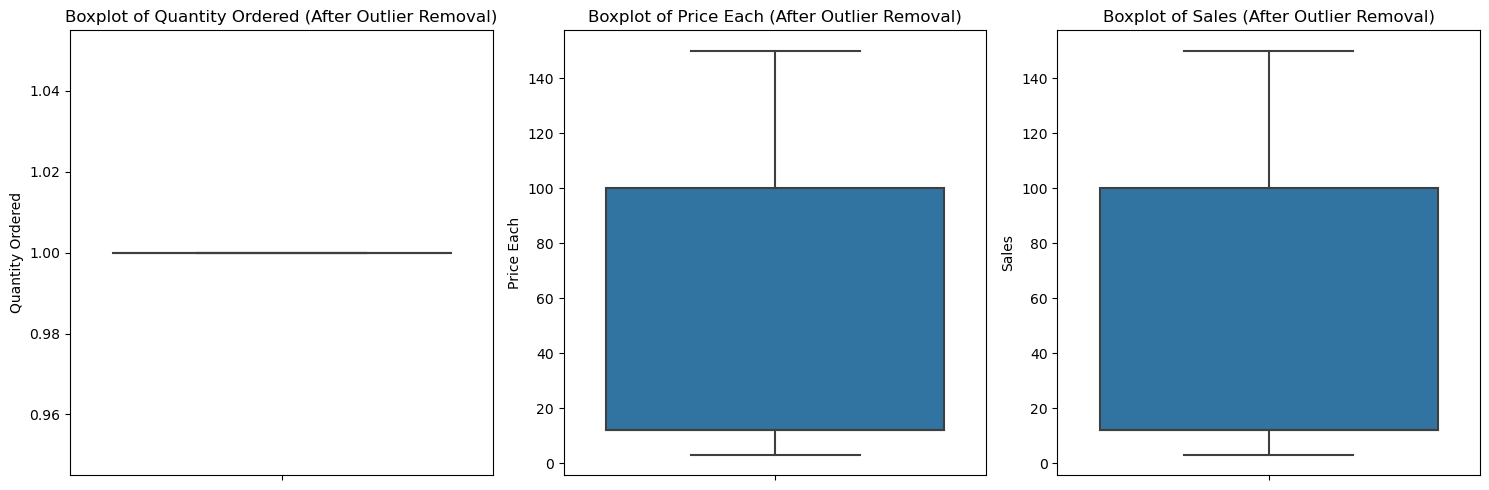

In [18]:
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()

In [19]:
missing_values = df_clean.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])



Missing values in each column:
Series([], dtype: int64)


In [20]:
df_clean = df_clean.dropna()
print(f"Final clean data shape: {df_clean.shape}")

Final clean data shape: (126819, 11)


Exploratory Data Analysis (EDA)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [22]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


In [23]:
print("Basic Statistics:")
print(df_clean.describe().T)

Basic Statistics:
                     count           mean           std        min        25%  \
Unnamed: 0        126819.0    8350.979380   5447.460727       0.00    3921.00   
Order ID          126819.0  230542.935609  51519.354605  141235.00  185886.50   
Quantity Ordered  126819.0       1.000000      0.000000       1.00       1.00   
Price Each        126819.0      47.721769     57.402927       2.99      11.95   
Month             126819.0       7.068129      3.503872       1.00       4.00   
Sales             126819.0      47.721769     57.402927       2.99      11.95   
Hour              126819.0      14.407959      5.421641       0.00      11.00   

                        50%        75%       max  
Unnamed: 0          7799.00   11885.00   25116.0  
Order ID          230629.00  275180.50  319670.0  
Quantity Ordered       1.00       1.00       1.0  
Price Each            11.99      99.99     150.0  
Month                  7.00      10.00      12.0  
Sales                 11.99

In [24]:
print("\nData Types:")
print(df_clean.dtypes)


Data Types:
Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object


In [25]:
def currency_formatter(x, pos):
    return f'${x:,.2f}'

currency_format = FuncFormatter(currency_formatter)


In [26]:
df_clean['Year'] = df_clean['Order Date'].dt.year
df_clean['Month'] = df_clean['Order Date'].dt.month
df_clean['Day'] = df_clean['Order Date'].dt.day
df_clean['Hour'] = df_clean['Order Date'].dt.hour
df_clean['Weekday'] = df_clean['Order Date'].dt.day_name()
df_clean['Month_Name'] = df_clean['Order Date'].dt.month_name()

In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

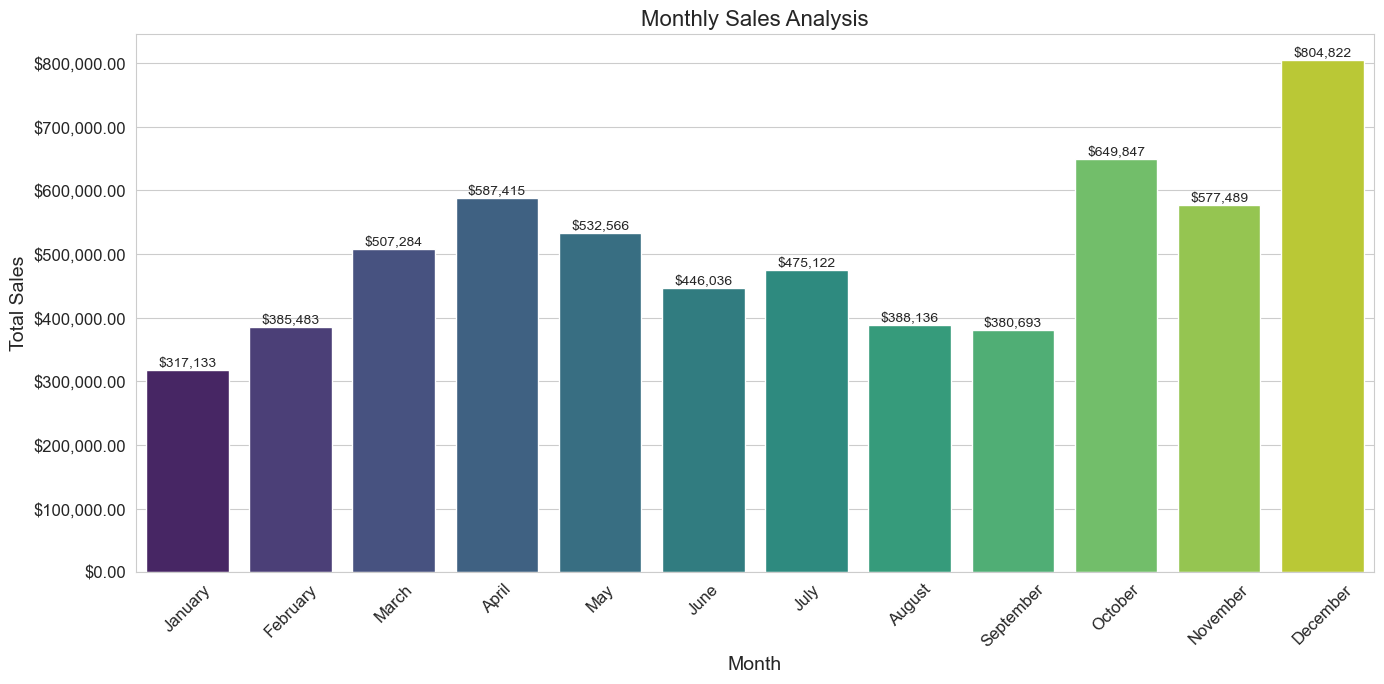

In [28]:
plt.figure(figsize=(14, 7))
monthly_sales = df_clean.groupby('Month_Name')['Sales'].sum().reindex(month_order)
ax = sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Monthly Sales Analysis', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(currency_format)
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

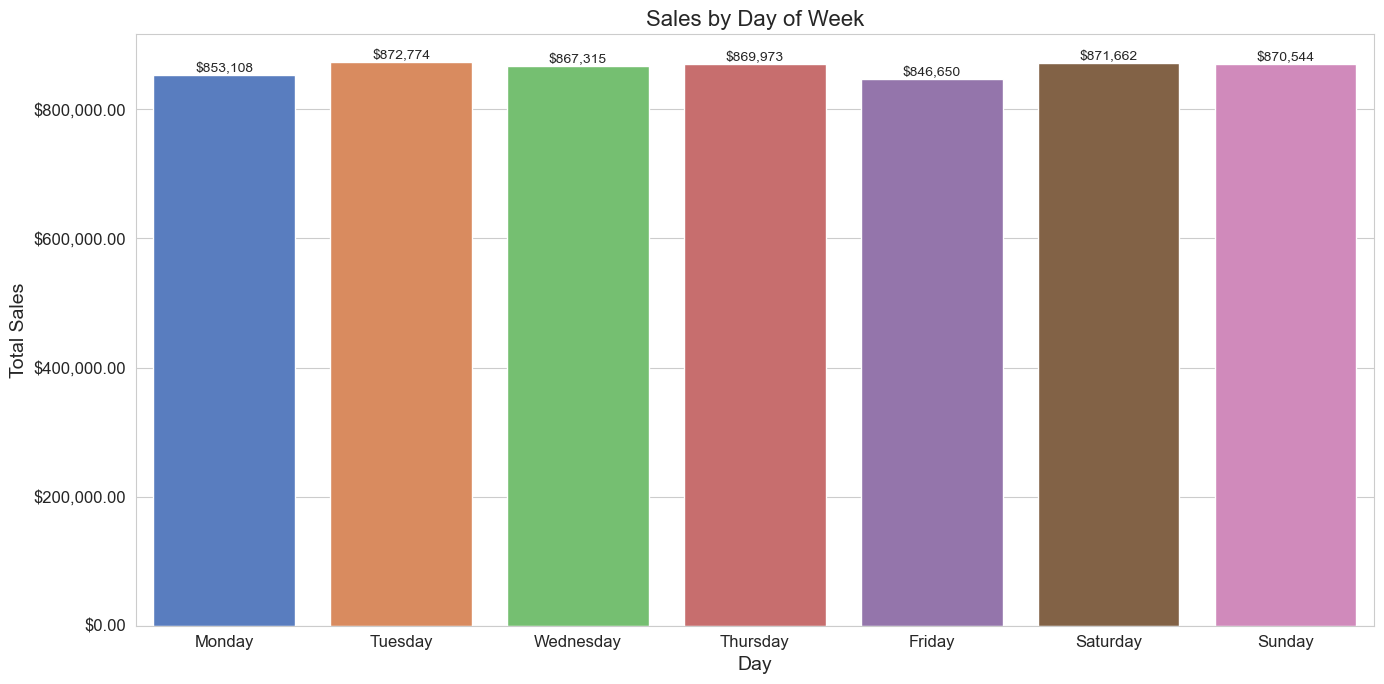

In [29]:
plt.figure(figsize=(14, 7))
daily_sales = df_clean.groupby('Weekday')['Sales'].sum().reindex(day_order)
ax = sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='muted')
plt.title('Sales by Day of Week', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
ax.yaxis.set_major_formatter(currency_format)
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

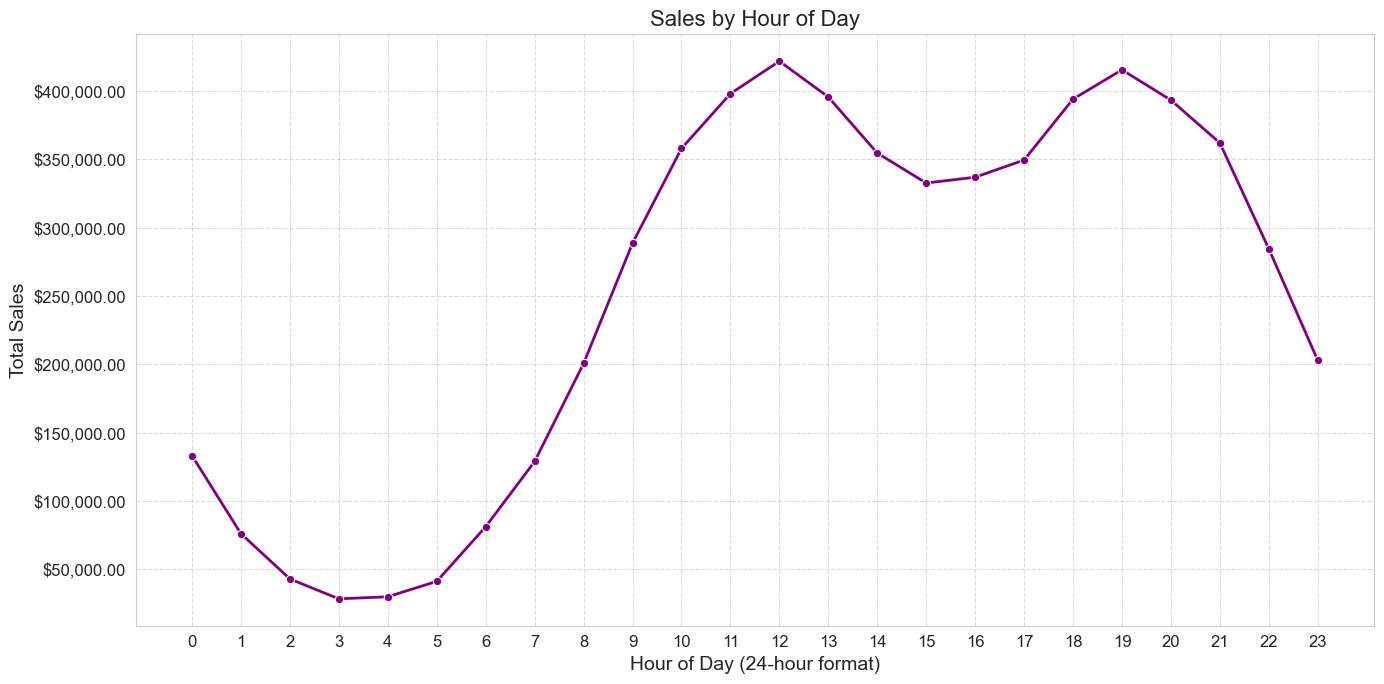

In [30]:
plt.figure(figsize=(14, 7))
hourly_sales = df_clean.groupby('Hour')['Sales'].sum()
ax = sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', linewidth=2, color='purple')
plt.title('Sales by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (24-hour format)', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(range(0, 24))
ax.yaxis.set_major_formatter(currency_format)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
top_products = df_clean.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)


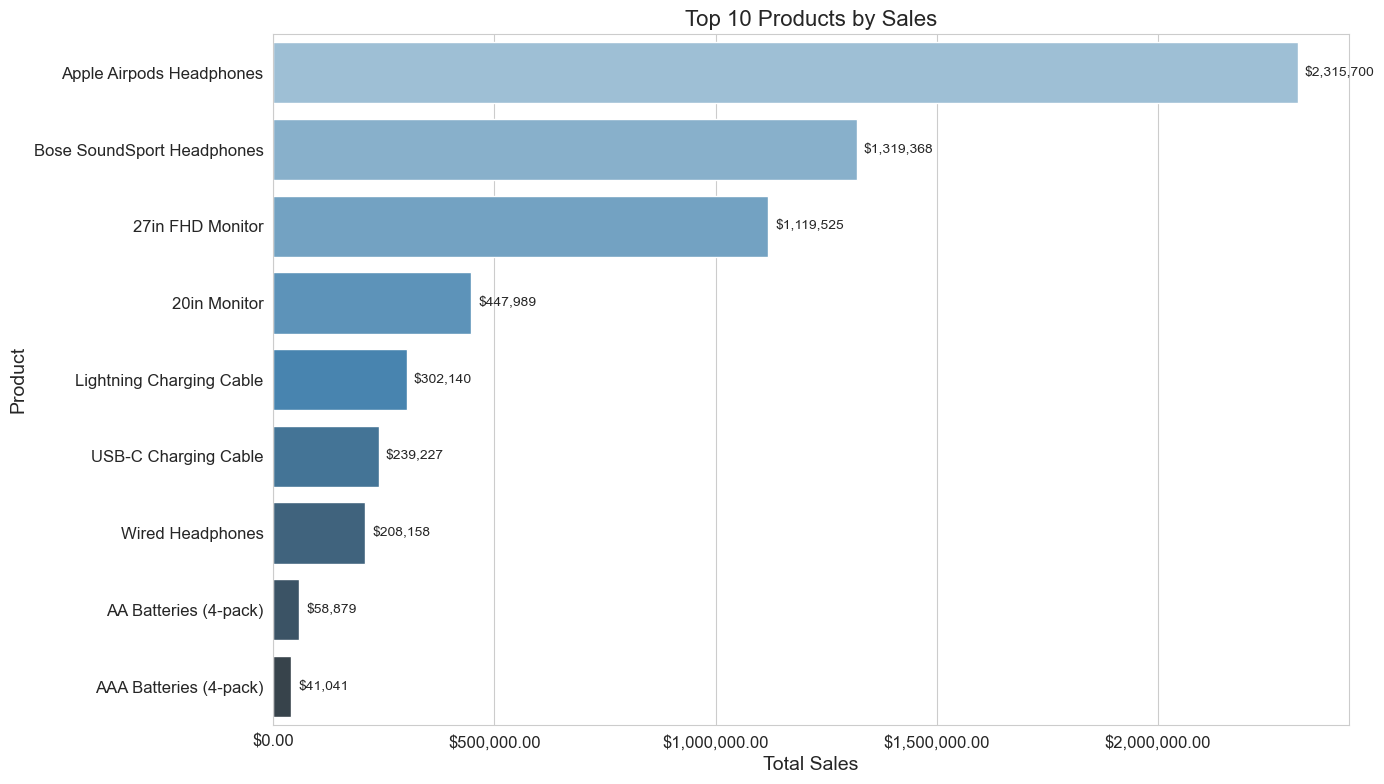

In [32]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_d')
plt.title('Top 10 Products by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Product', fontsize=14)
ax.xaxis.set_major_formatter(currency_format)
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha = 'left', va = 'center', fontsize=10, xytext=(5, 0), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

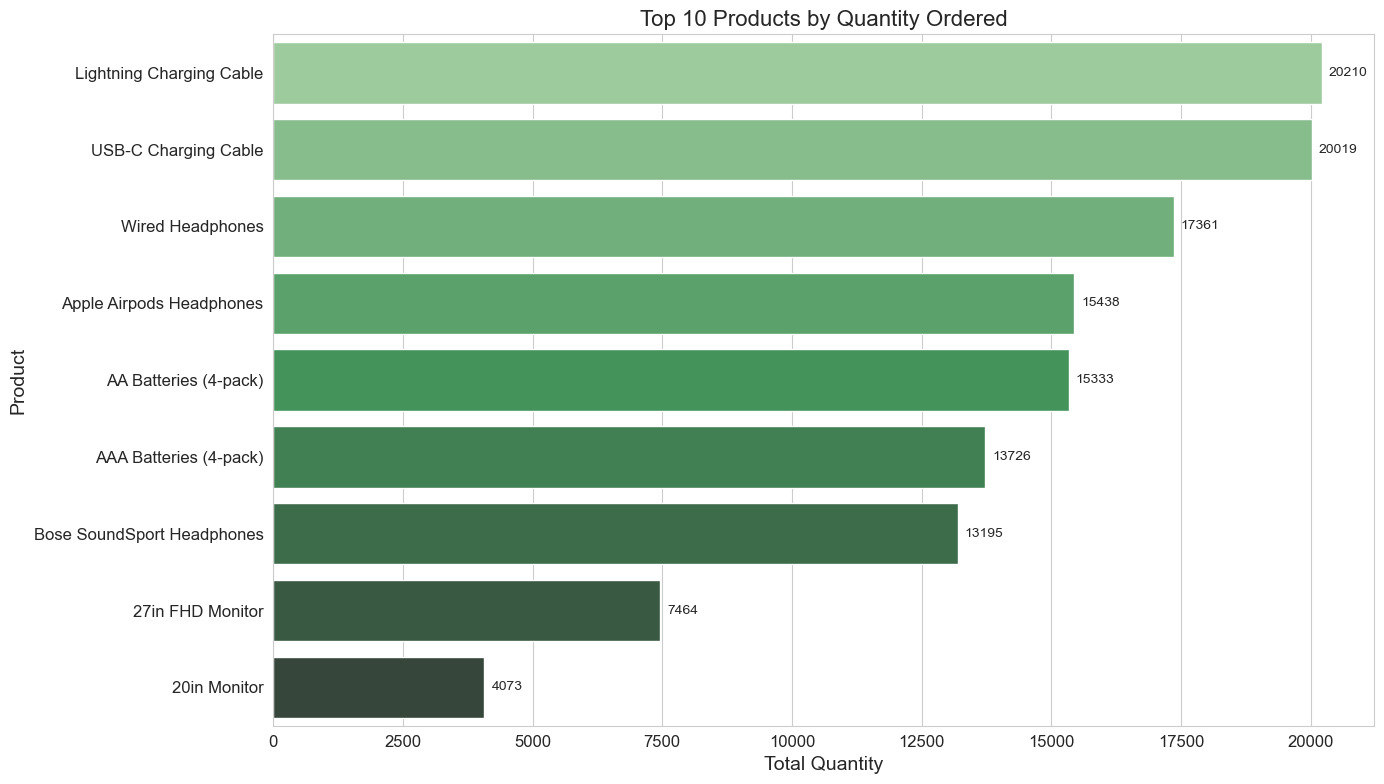

In [33]:
top_qty = df_clean.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_qty.values, y=top_qty.index, palette='Greens_d')
plt.title('Top 10 Products by Quantity Ordered', fontsize=16)
plt.xlabel('Total Quantity', fontsize=14)
plt.ylabel('Product', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha = 'left', va = 'center', fontsize=10, xytext=(5, 0), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [34]:
df_clean['City'] = df_clean['Purchase Address'].apply(lambda x: x.split(',')[1].strip() if isinstance(x, str) and ',' in x else 'Unknown')


In [35]:
city_sales = df_clean.groupby('City')['Sales'].sum().sort_values(ascending=False)


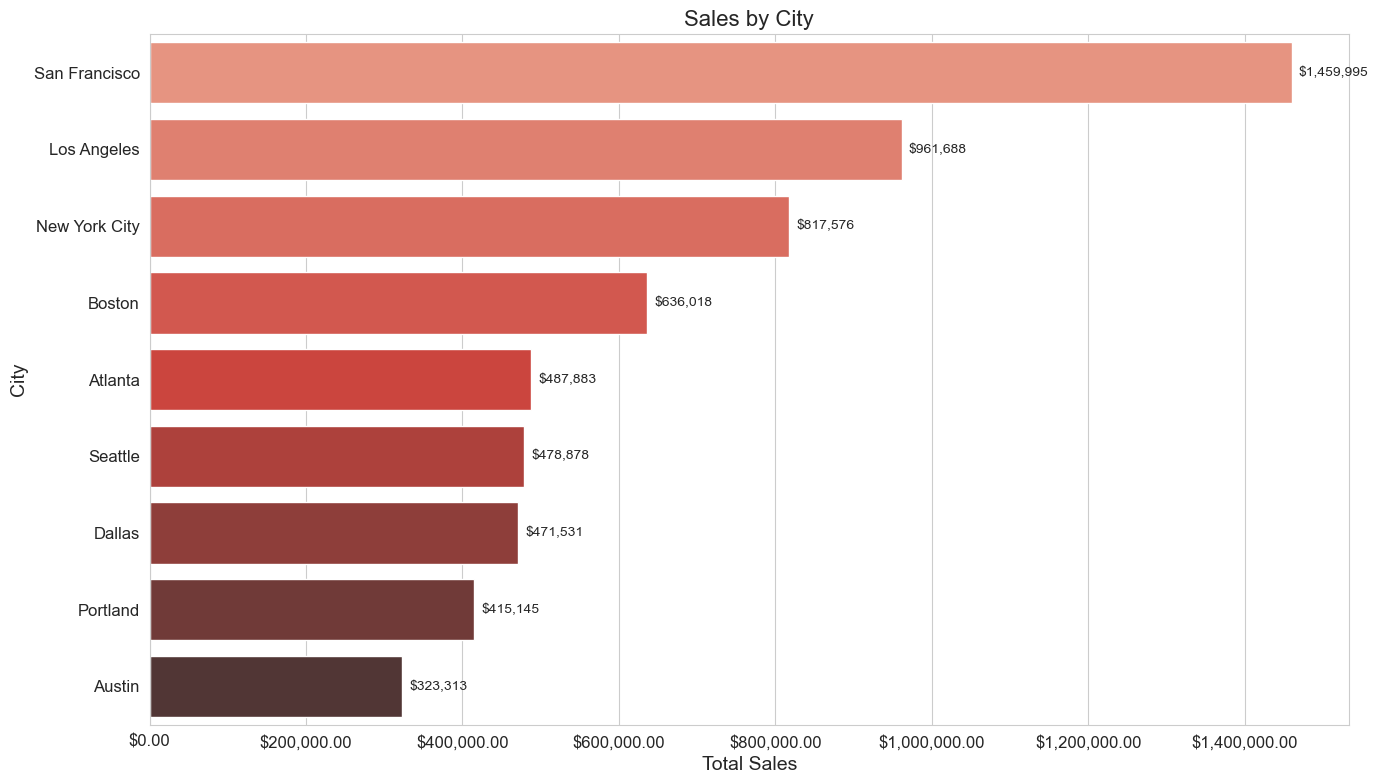

In [36]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=city_sales.values, y=city_sales.index, palette='Reds_d')
plt.title('Sales by City', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('City', fontsize=14)
ax.xaxis.set_major_formatter(currency_format)
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha = 'left', va = 'center', fontsize=10, xytext=(5, 0), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

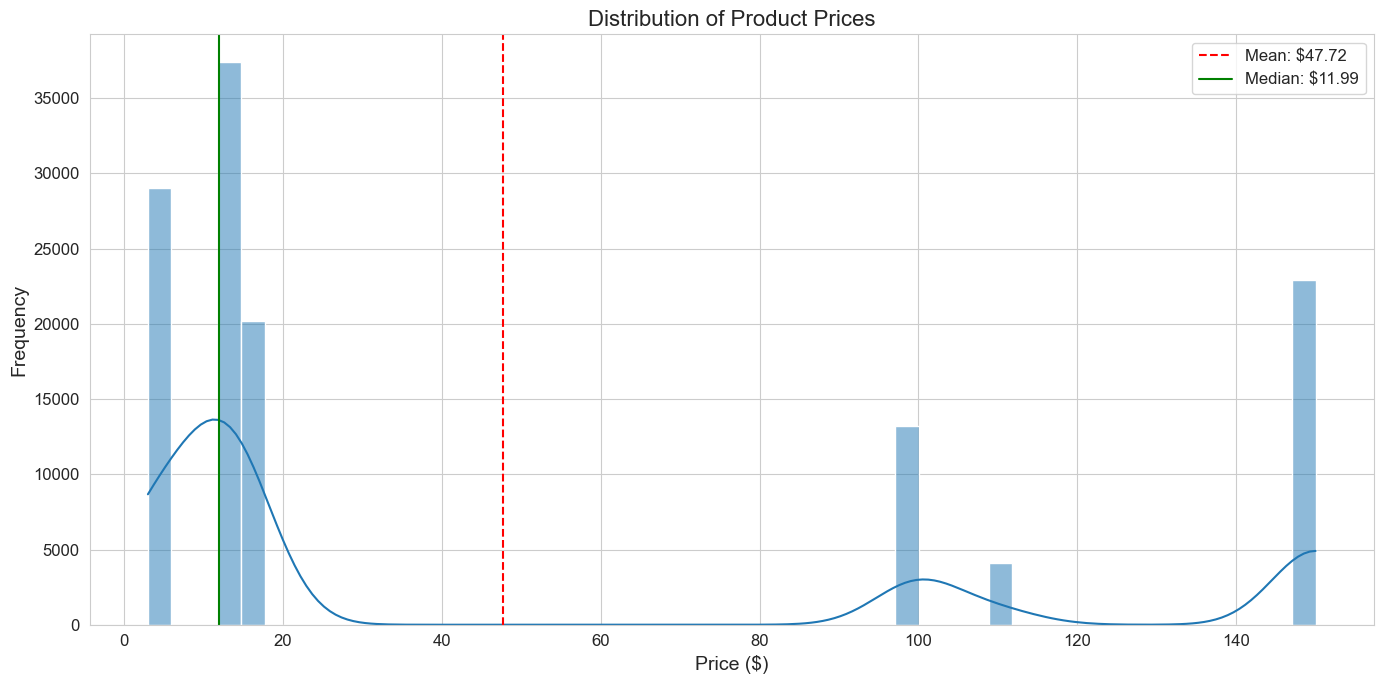

In [37]:
plt.figure(figsize=(14, 7))
ax = sns.histplot(df_clean['Price Each'], kde=True, bins=50)
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(df_clean['Price Each'].mean(), color='red', linestyle='--', 
            label=f'Mean: ${df_clean["Price Each"].mean():.2f}')
plt.axvline(df_clean['Price Each'].median(), color='green', linestyle='-', 
            label=f'Median: ${df_clean["Price Each"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

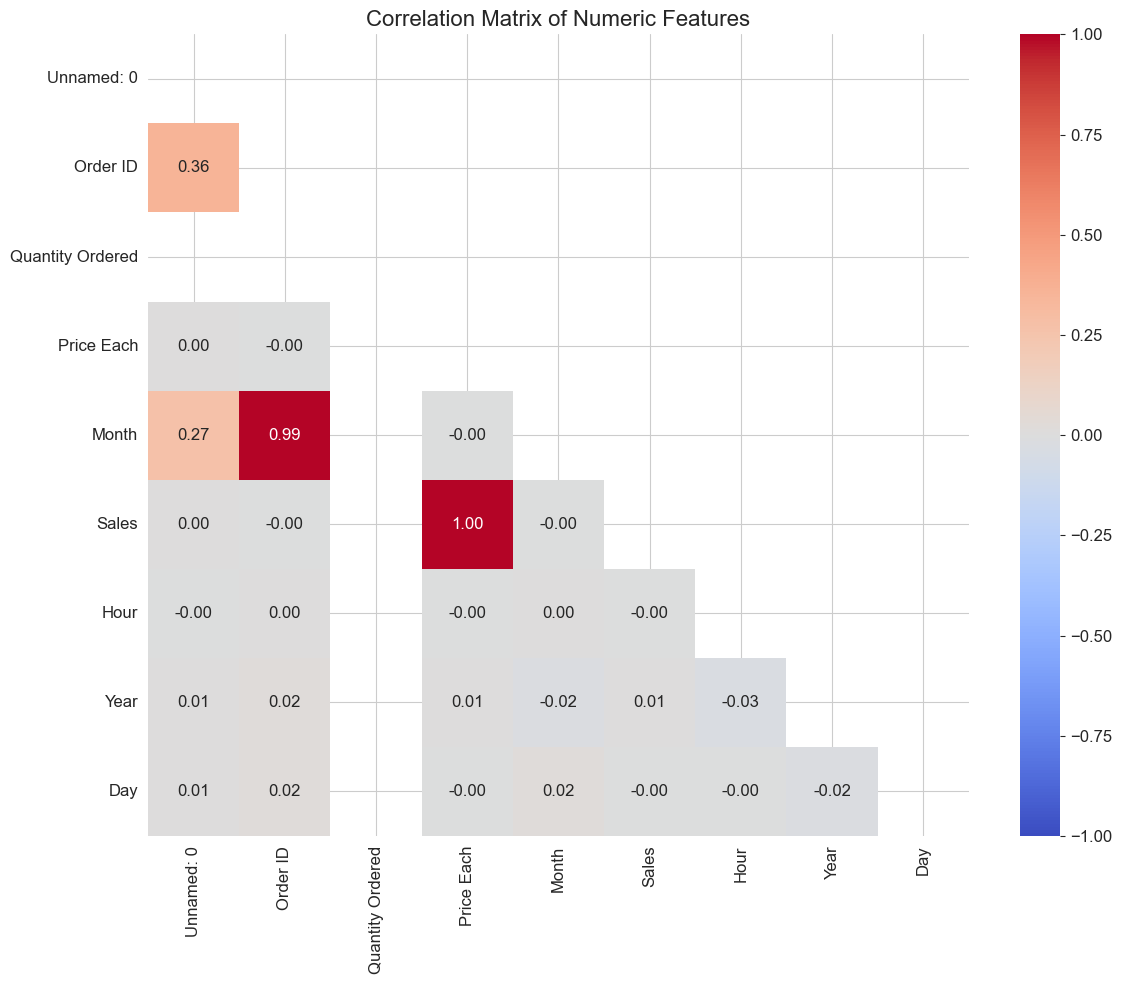

In [38]:
numeric_df = df_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
mask = np.triu(correlation_matrix)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                      mask=mask, vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

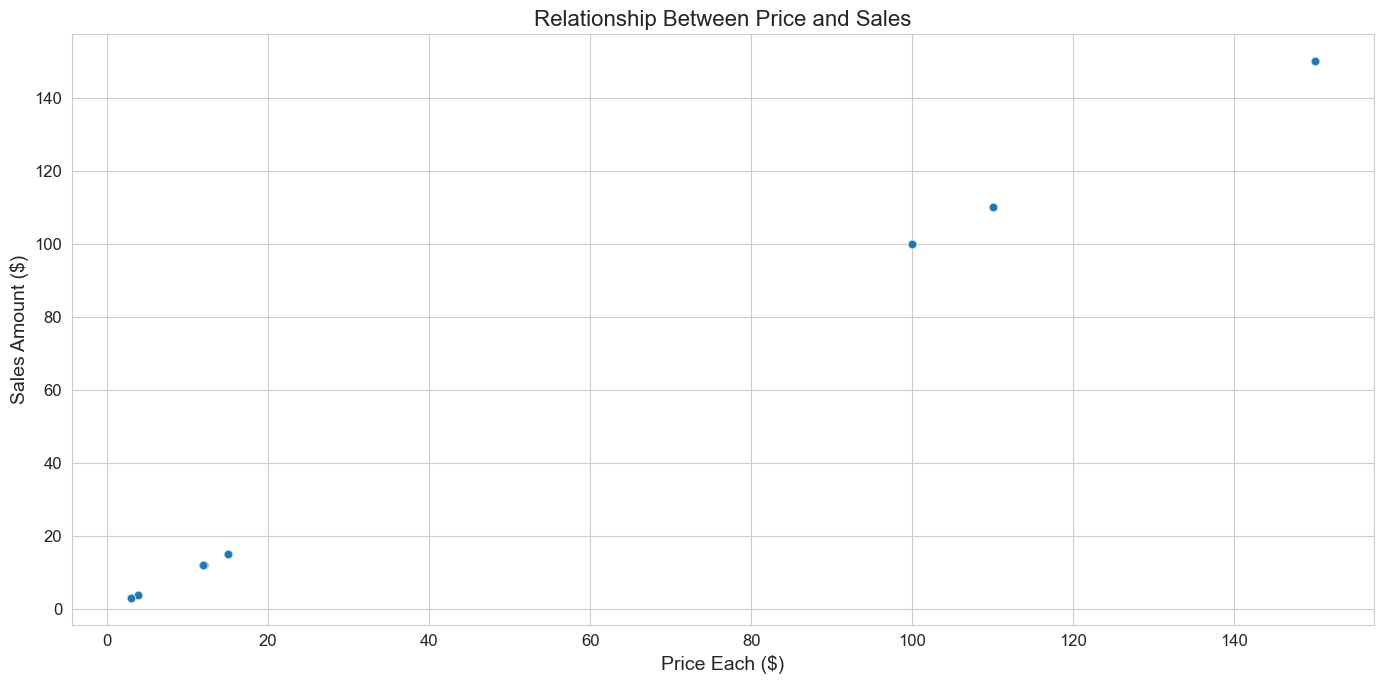

In [39]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Price Each', y='Sales', data=df_clean, alpha=0.5)
plt.title('Relationship Between Price and Sales', fontsize=16)
plt.xlabel('Price Each ($)', fontsize=14)
plt.ylabel('Sales Amount ($)', fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1600x1200 with 0 Axes>

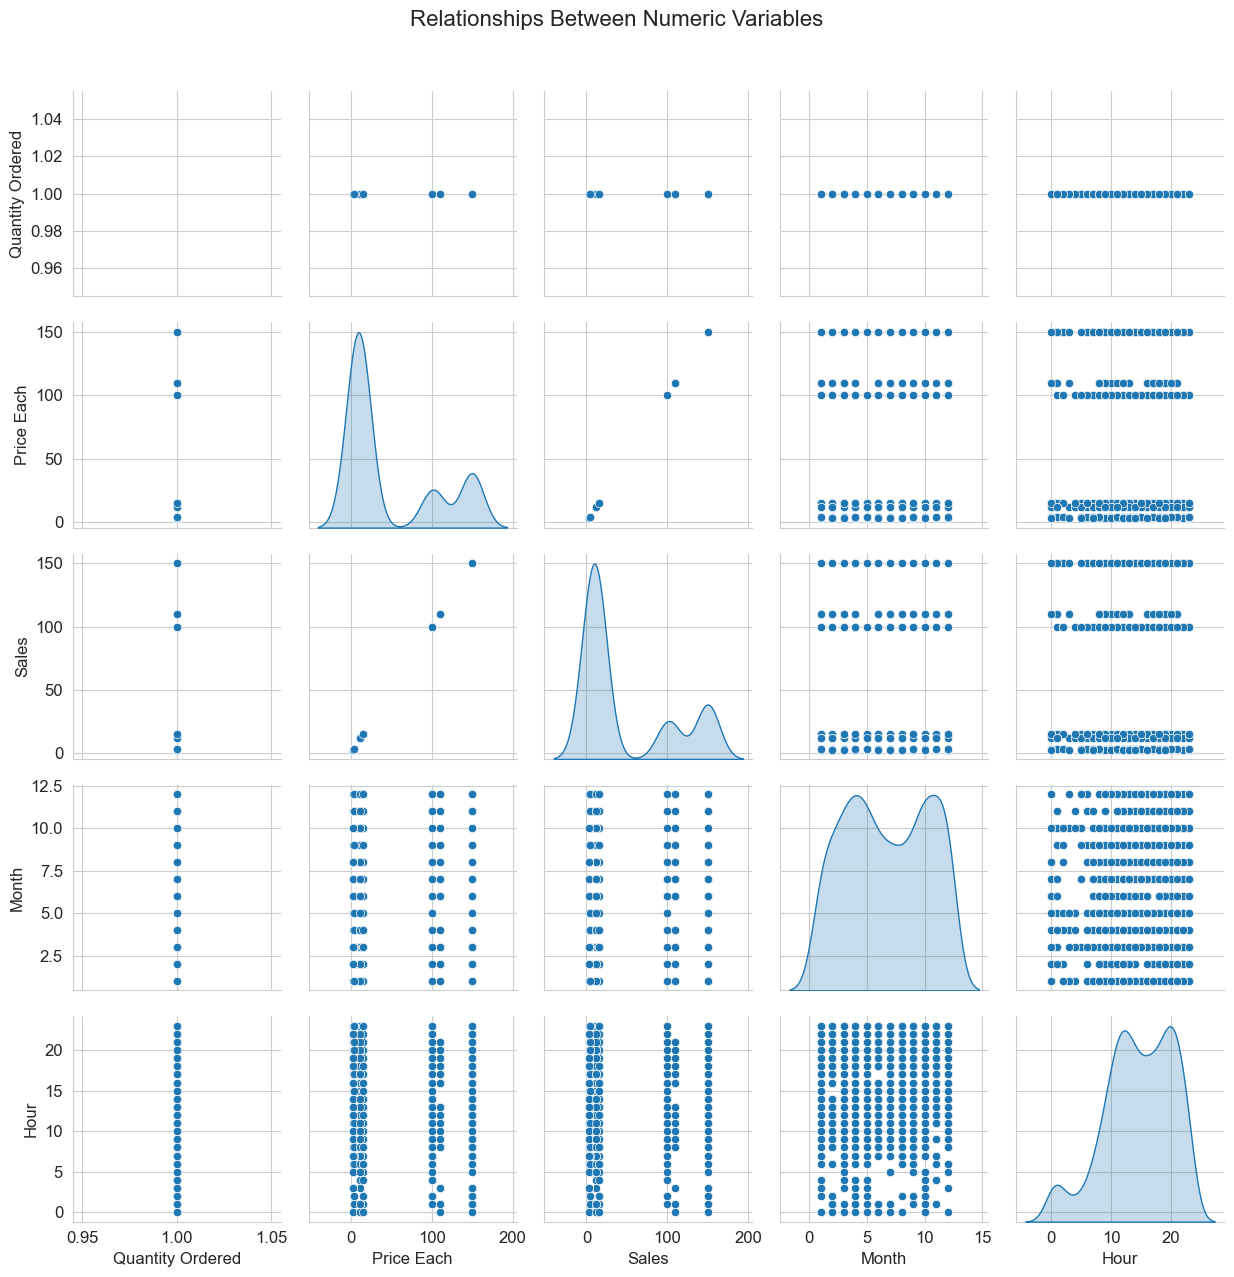

In [40]:
plt.figure(figsize=(16, 12))
subset_df = df_clean[['Quantity Ordered', 'Price Each', 'Sales', 'Month', 'Hour']].sample(1000)
sns.pairplot(subset_df, diag_kind='kde', height=2.5)
plt.suptitle('Relationships Between Numeric Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Feature Encoding & Transformation

In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [42]:
missing_values = df_clean.isnull().sum()
print("Missing values before handling:")
print(missing_values[missing_values > 0])

Missing values before handling:
Series([], dtype: int64)


In [43]:
if df_clean.isnull().sum().sum() > 0:
    # For numeric columns
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    # For categorical columns
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print("Missing values after handling:")
print(df_clean.isnull().sum().sum())

Missing values after handling:
0


In [44]:
categorical_columns = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns: {categorical_columns}")


Categorical columns: ['Product', 'Purchase Address', 'City', 'Weekday', 'Month_Name']


In [45]:
le = LabelEncoder()
df_clean_encoded = df_clean.copy()

In [46]:
for col in ['Weekday', 'Month_Name']:  # Example ordinal variables
    if col in df_clean_encoded.columns:
        df_clean_encoded[f'{col}_label'] = le.fit_transform(df_clean_encoded[col])
        # Map encoded values for verification
        mapping = {idx: label for idx, label in enumerate(le.classes_)}
        print(f"\nLabel Encoding mapping for {col}:")
        print(mapping)



Label Encoding mapping for Weekday:
{0: 'Friday', 1: 'Monday', 2: 'Saturday', 3: 'Sunday', 4: 'Thursday', 5: 'Tuesday', 6: 'Wednesday'}

Label Encoding mapping for Month_Name:
{0: 'April', 1: 'August', 2: 'December', 3: 'February', 4: 'January', 5: 'July', 6: 'June', 7: 'March', 8: 'May', 9: 'November', 10: 'October', 11: 'September'}


In [47]:
ohe_cols = ['City', 'Product']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


In [48]:
for col in ohe_cols:
    if col in df_clean_encoded.columns:
        # For product, consider only top products to avoid too many columns
        if col == 'Product':
            top_products = df_clean_encoded[col].value_counts().nlargest(5).index.tolist()
            temp_col = df_clean_encoded[col].apply(lambda x: x if x in top_products else 'Other')
            ohe_result = ohe.fit_transform(temp_col.values.reshape(-1, 1))
        else:
            ohe_result = ohe.fit_transform(df_clean_encoded[col].values.reshape(-1, 1))
        
        # Create df with encoded values
        ohe_df = pd.DataFrame(ohe_result, columns=[f"{col}_{cat}" for cat in ohe.categories_[0]])
        
        # Concatenate with main dataframe
        df_clean_encoded = pd.concat([df_clean_encoded, ohe_df], axis=1)
        
        print(f"\nOne-Hot Encoding generated {ohe_result.shape[1]} columns for {col}")


One-Hot Encoding generated 9 columns for City

One-Hot Encoding generated 6 columns for Product


In [49]:
numeric_features = ['Price Each', 'Quantity Ordered', 'Sales']

for col in numeric_features:
    if col in df_clean_encoded.columns and (df_clean_encoded[col] > 0).all():
        df_clean_encoded[f'{col}_log'] = np.log(df_clean_encoded[col])
        
        # Visualize transformation
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Original distribution
        sns.histplot(df_clean_encoded[col], kde=True, ax=ax1)
        ax1.set_title(f'Original Distribution of {col}')
        
        # Log-transformed distribution
        sns.histplot(df_clean_encoded[f'{col}_log'], kde=True, ax=ax2)
        ax2.set_title(f'Log-Transformed Distribution of {col}')
        
        plt.tight_layout()
        plt.show()

        
       


Yeo-Johnson transformation for Price Each with lambda = 8.4721


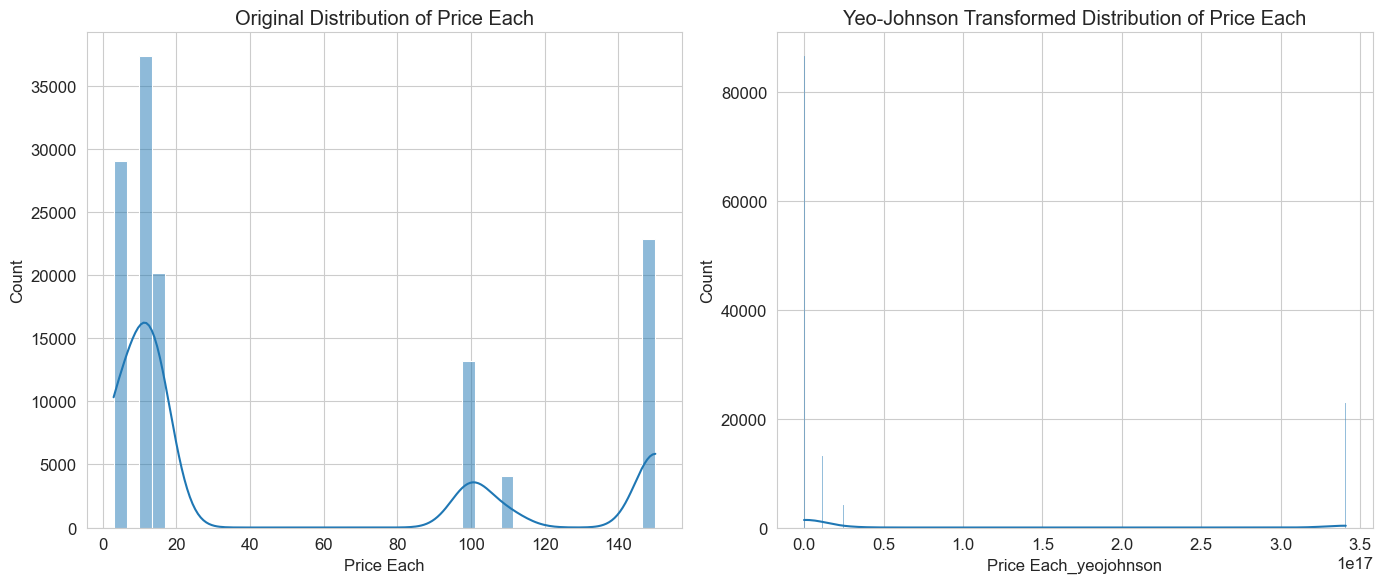


Yeo-Johnson transformation for Quantity Ordered with lambda = 8.4721


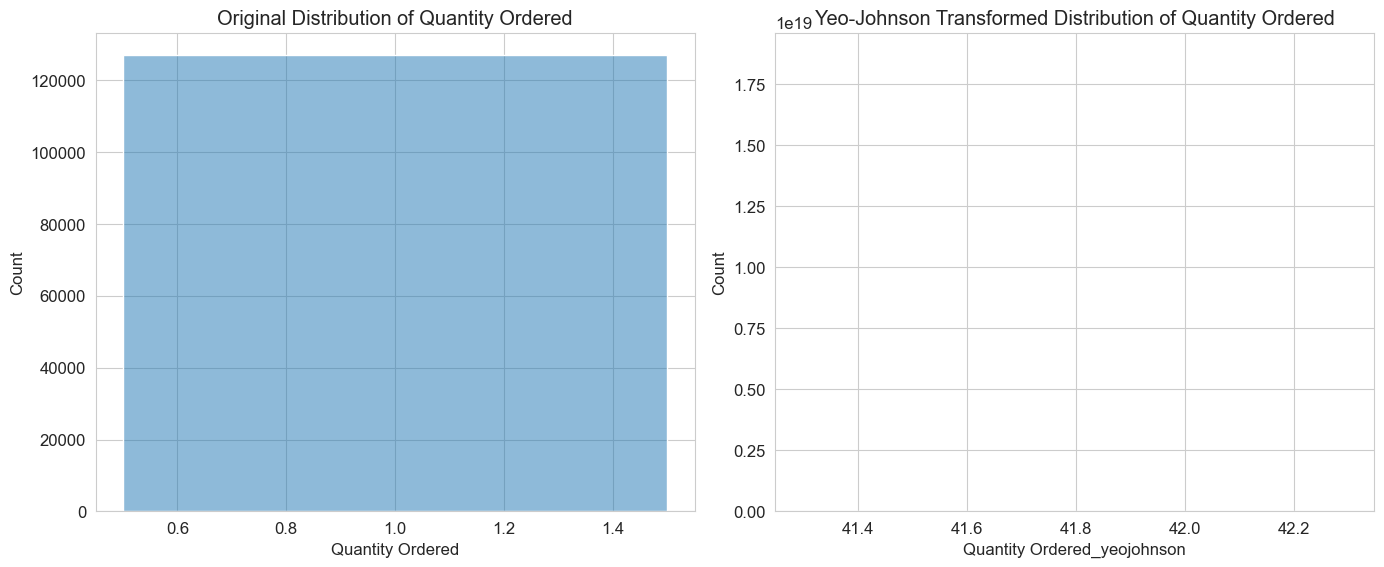


Yeo-Johnson transformation for Sales with lambda = 8.4721


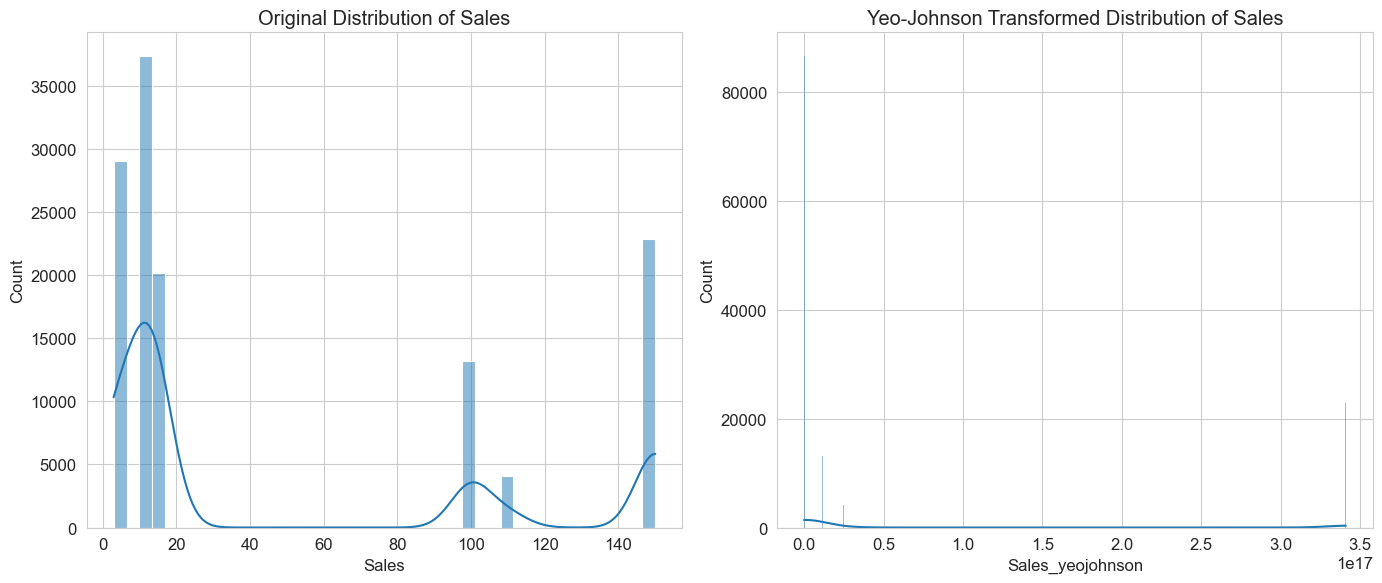

In [50]:
for col in numeric_features:
    if col in df_clean_encoded.columns:
        try:
            transformed_data, lambda_val = yeojohnson(df_clean_encoded[col])
            df_clean_encoded[f'{col}_yeojohnson'] = transformed_data
            
            print(f"\nYeo-Johnson transformation for {col} with lambda = {lambda_val:.4f}")
            
            # Visualize transformation
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
            
            # Original distribution
            sns.histplot(df_clean_encoded[col], kde=True, ax=ax1)
            ax1.set_title(f'Original Distribution of {col}')
            
            # Yeo-Johnson transformed distribution
            sns.histplot(df_clean_encoded[f'{col}_yeojohnson'], kde=True, ax=ax2)
            ax2.set_title(f'Yeo-Johnson Transformed Distribution of {col}')
            
            plt.tight_layout()
            plt.show()
        except:
            print(f"Could not apply Yeo-Johnson to {col}")

In [51]:
df_clean_encoded['Day_of_Week_num'] = df_clean_encoded['Order Date'].dt.dayofweek
df_clean_encoded['Is_Weekend'] = df_clean_encoded['Day_of_Week_num'].apply(lambda x: 1 if x >= 5 else 0)
df_clean_encoded['Is_Morning'] = df_clean_encoded['Hour'].apply(lambda x: 1 if 5 <= x < 12 else 0)
df_clean_encoded['Is_Afternoon'] = df_clean_encoded['Hour'].apply(lambda x: 1 if 12 <= x < 17 else 0)
df_clean_encoded['Is_Evening'] = df_clean_encoded['Hour'].apply(lambda x: 1 if 17 <= x < 22 else 0)
df_clean_encoded['Is_Night'] = df_clean_encoded['Hour'].apply(lambda x: 1 if x >= 22 or x < 5 else 0)
df_clean_encoded['Price_Tier'] = pd.qcut(df_clean_encoded['Price Each'], 4, labels=False)


In [52]:
# Calculate the 75th percentile of the 'Sales' column
q75 = df_clean_encoded['Sales'].quantile(0.75)

# Create a new column 'High_Value_Order' based on the 75th percentile
df_clean_encoded['High_Value_Order'] = (df_clean_encoded['Sales'] > q75).astype(int)


In [53]:
print("\nFeature Engineering Summary:")
new_features = ['Is_Weekend', 'Is_Morning', 'Is_Afternoon', 'Is_Evening', 
                'Is_Night', 'Price_Tier', 'High_Value_Order']
print(df_clean_encoded[new_features].head())


Feature Engineering Summary:
   Is_Weekend  Is_Morning  Is_Afternoon  Is_Evening  Is_Night  Price_Tier  \
2           0           0             0           1         0         0.0   
3           1           0             1           0         0         3.0   
4           0           0             1           0         0         0.0   
5           0           0             0           0         1         0.0   
6           0           0             1           0         0         0.0   

   High_Value_Order  
2                 0  
3                 1  
4                 0  
5                 0  
6                 0  


In [54]:
print(f"\nFinal encoded dataframe shape: {df_clean_encoded.shape}")
print(f"Added {df_clean_encoded.shape[1] - df_clean.shape[1]} new features")


Final encoded dataframe shape: (179838, 43)
Added 28 new features


In [55]:
correlations = df_clean_encoded[new_features + ['Sales']].corr()['Sales'].sort_values(ascending=False)
print("\nCorrelations of new features with Sales:")
print(correlations)


Correlations of new features with Sales:
Sales               1.000000
High_Value_Order    0.871399
Price_Tier          0.835452
Is_Night            0.004010
Is_Afternoon        0.003400
Is_Weekend          0.003054
Is_Morning         -0.003101
Is_Evening         -0.003372
Name: Sales, dtype: float64


In [56]:
df_clean_encoded['Order Date'] = pd.to_datetime(df_clean_encoded['Order Date'])

df_clean_encoded['Weekday'] = df_clean_encoded['Order Date'].dt.weekday

df_clean_encoded['Is_Weekend'] = df_clean_encoded['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

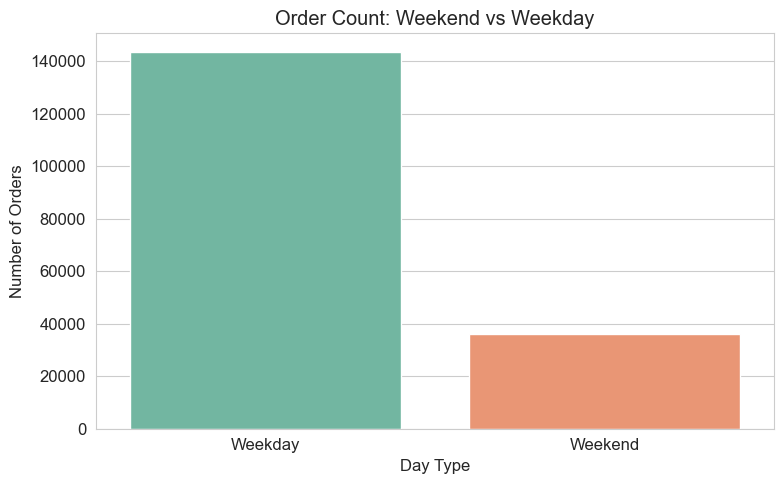

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns  # <-- add this line

plt.figure(figsize=(8, 5))
sns.countplot(x='Is_Weekend', data=df_clean_encoded, palette='Set2')
plt.title('Order Count: Weekend vs Weekday')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.xlabel('Day Type')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


In [58]:
# Ensure datetime conversion
df_clean_encoded['Order Date'] = pd.to_datetime(df_clean_encoded['Order Date'])

# Extract the hour
df_clean_encoded['Hour'] = df_clean_encoded['Order Date'].dt.hour
# Define time of day segments using binary flags
df_clean_encoded['Is_Morning'] = df_clean_encoded['Hour'].between(5, 11).astype(int)
df_clean_encoded['Is_Afternoon'] = df_clean_encoded['Hour'].between(12, 16).astype(int)
df_clean_encoded['Is_Evening'] = df_clean_encoded['Hour'].between(17, 20).astype(int)
df_clean_encoded['Is_Night'] = df_clean_encoded['Hour'].apply(lambda x: 1 if x >= 21 or x <= 4 else 0)



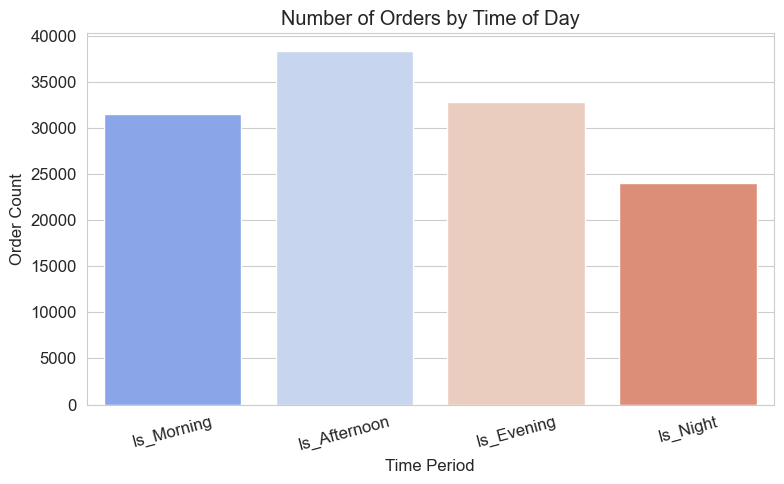

In [59]:
time_periods = ['Is_Morning', 'Is_Afternoon', 'Is_Evening', 'Is_Night']
counts = [df_clean_encoded[tp].sum() for tp in time_periods]

plt.figure(figsize=(8, 5))
sns.barplot(x=time_periods, y=counts, palette='coolwarm')
plt.title('Number of Orders by Time of Day')
plt.xlabel('Time Period')
plt.ylabel('Order Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [60]:
print(df_clean_encoded.columns)


Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour',
       'Year', 'Day', 'Weekday', 'Month_Name', 'Weekday_label',
       'Month_Name_label', 'City_Atlanta', 'City_Austin', 'City_Boston',
       'City_Dallas', 'City_Los Angeles', 'City_New York City',
       'City_Portland', 'City_San Francisco', 'City_Seattle',
       'Product_AA Batteries (4-pack)', 'Product_Apple Airpods Headphones',
       'Product_Lightning Charging Cable', 'Product_Other',
       'Product_USB-C Charging Cable', 'Product_Wired Headphones',
       'Price Each_yeojohnson', 'Quantity Ordered_yeojohnson',
       'Sales_yeojohnson', 'Day_of_Week_num', 'Is_Weekend', 'Is_Morning',
       'Is_Afternoon', 'Is_Evening', 'Is_Night', 'Price_Tier',
       'High_Value_Order'],
      dtype='object')


In [61]:
df_clean_encoded['Price_Tier'] = pd.qcut(df_clean_encoded['Price Each'], q=4, labels=False)


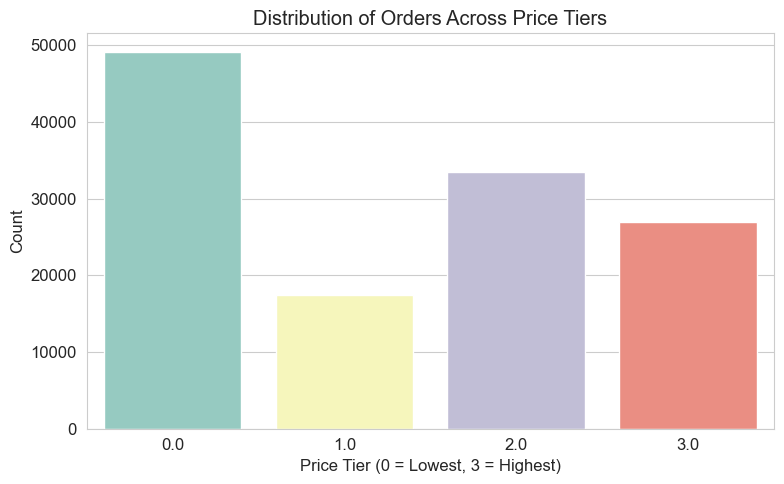

In [62]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Price_Tier', data=df_clean_encoded, palette='Set3')
plt.title('Distribution of Orders Across Price Tiers')
plt.xlabel('Price Tier (0 = Lowest, 3 = Highest)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [63]:
df_clean_encoded['Price Each'] = pd.to_numeric(df_clean_encoded['Price Each'], errors='coerce')

df_clean_encoded = df_clean_encoded.dropna(subset=['Price Each'])
df_clean_encoded['Price_Tier'] = pd.qcut(df_clean_encoded['Price Each'], q=4, labels=False)



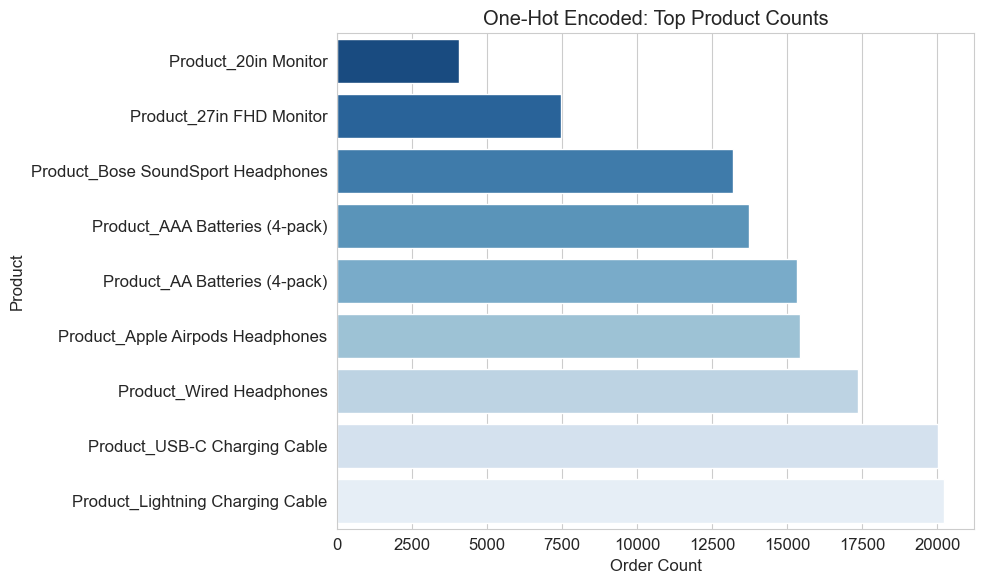

In [64]:
product_dummies = pd.get_dummies(df_clean['Product'], prefix='Product')

df_clean_encoded = pd.concat([df_clean, product_dummies], axis=1)

encoded_product_cols = product_dummies.columns.tolist()

if encoded_product_cols:
    product_sums = df_clean_encoded[encoded_product_cols].sum().sort_values()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_sums.values, y=product_sums.index, palette='Blues_r')
    plt.title('One-Hot Encoded: Top Product Counts')
    plt.xlabel('Order Count')
    plt.ylabel('Product')
    plt.tight_layout()  # ✅ Correct here
    plt.show()
else:
    print("No one-hot encoded product columns found.")


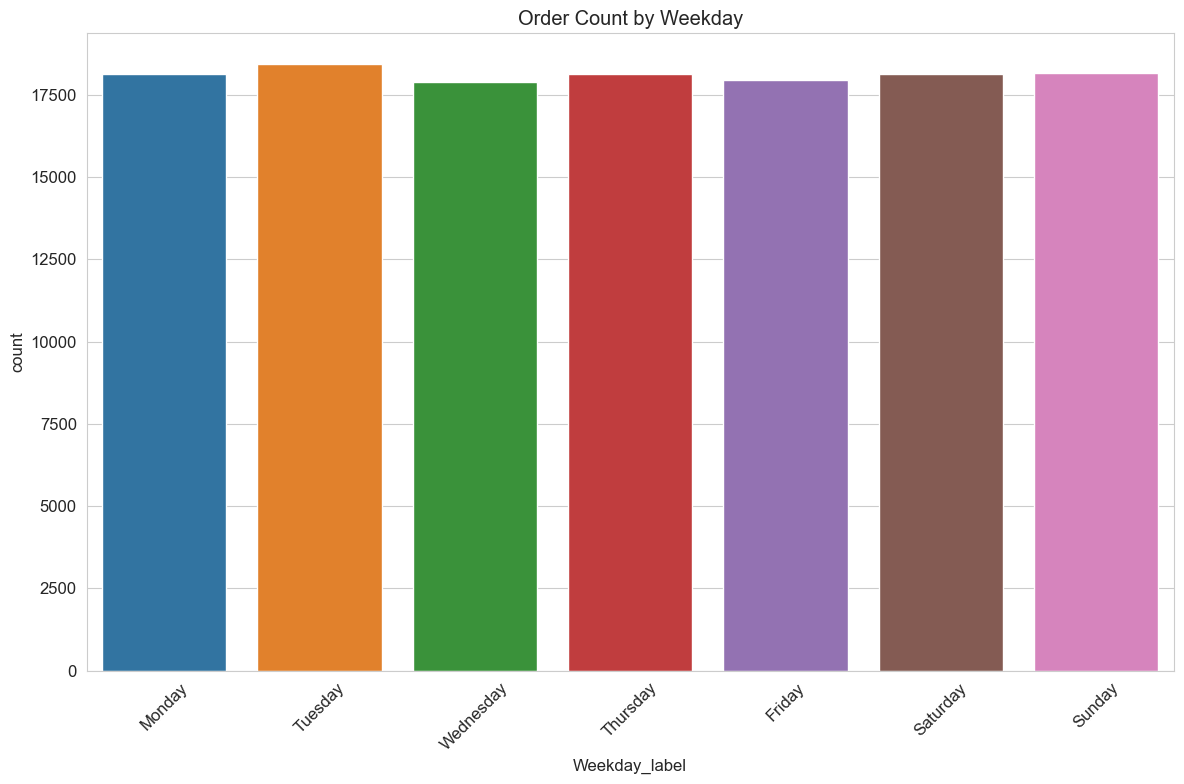

In [65]:
df_clean_encoded['Order Date'] = pd.to_datetime(df_clean_encoded['Order Date'], errors='coerce')

df_clean_encoded['Weekday_label'] = df_clean_encoded['Order Date'].dt.day_name()

sns.countplot(data=df_clean_encoded, x='Weekday_label', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Order Count by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature Scaling & Selection

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


In [67]:
features_to_scale = ['Quantity Ordered', 'Price Each']


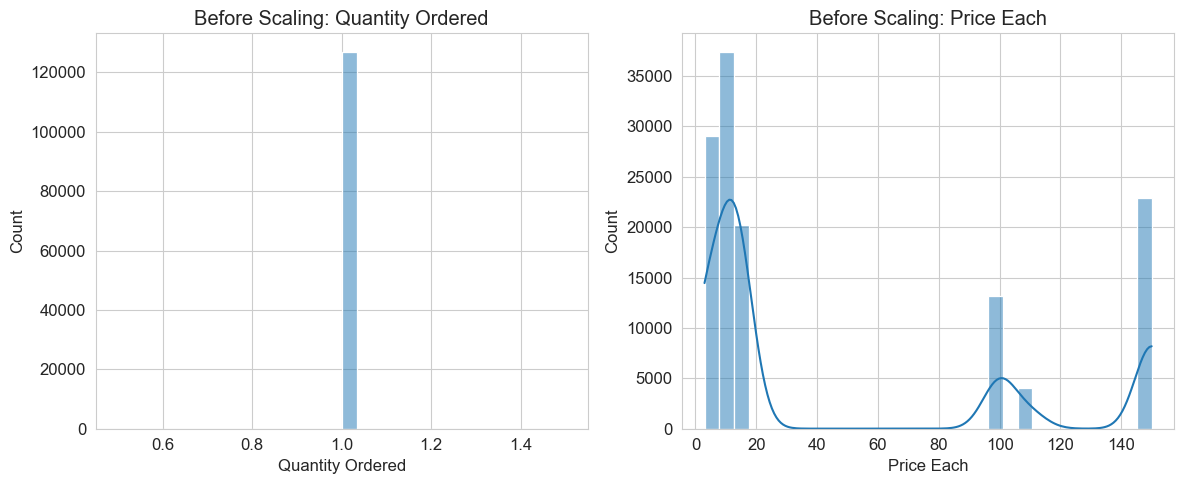

In [68]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(features_to_scale):
    plt.subplot(1, len(features_to_scale), i+1)
    sns.histplot(df_clean_encoded[col], kde=True, bins=30)
    plt.title(f'Before Scaling: {col}')
plt.tight_layout()
plt.show()

In [69]:
df_for_scaling = df_clean_encoded.select_dtypes(include=[np.number])
print(f"Shape of numeric data for scaling: {df_for_scaling.shape}")

Shape of numeric data for scaling: (126819, 18)


In [70]:
y = df_for_scaling['Sales'].copy()
X = df_for_scaling.drop(['Sales'], axis=1)

In [71]:
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
print(f"Shape after dropping invalid columns: {X.shape}")

Shape after dropping invalid columns: (126819, 17)


In [72]:
def remove_highly_correlated_features(X, threshold=0.85):
    correlation_matrix = X.corr().abs()
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    print(f"Dropping {len(to_drop)} highly correlated features with threshold {threshold}")
    return X.drop(to_drop, axis=1)

In [73]:
X_reduced = remove_highly_correlated_features(X)
print(f"Shape after removing highly correlated features: {X_reduced.shape}")

Dropping 1 highly correlated features with threshold 0.85
Shape after removing highly correlated features: (126819, 16)


In [74]:
feature_names = X_reduced.columns.tolist()


In [75]:
ss = StandardScaler()
X_standard = ss.fit_transform(X_reduced)
X_standard_df = pd.DataFrame(X_standard, columns=feature_names)


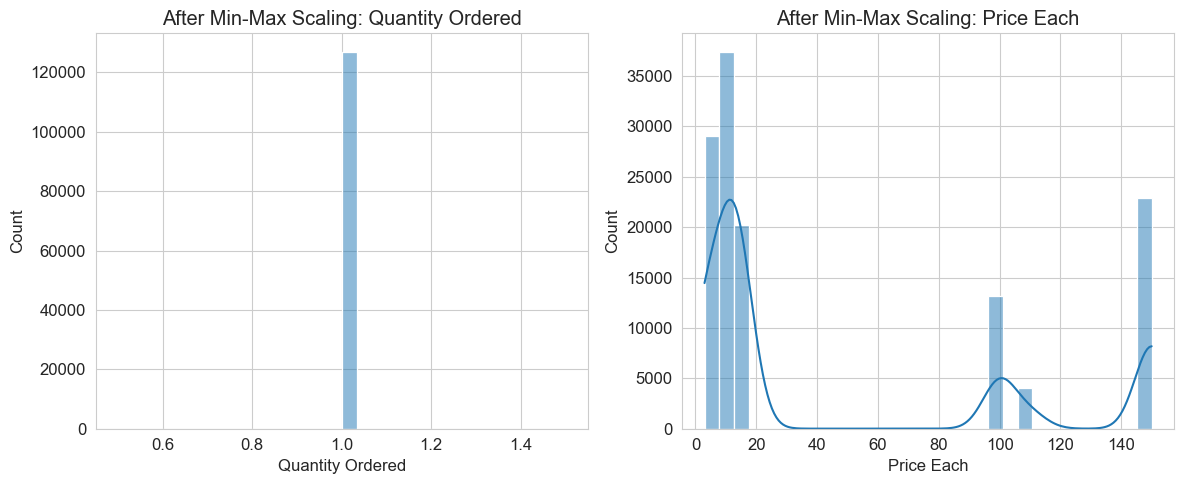

In [76]:
df_scaled = df_clean_encoded.copy()

plt.figure(figsize=(12, 5))
for i, col in enumerate(features_to_scale):
    plt.subplot(1, len(features_to_scale), i+1)
    sns.histplot(df_scaled[col], kde=True, bins=30)
    plt.title(f'After Min-Max Scaling: {col}')
plt.tight_layout()
plt.show()

In [77]:
scaler = MinMaxScaler()
df_scaled = df_clean_encoded.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

In [78]:
rs = RobustScaler()
X_robust = rs.fit_transform(X_reduced)
X_robust_df = pd.DataFrame(X_robust, columns=feature_names)


In [79]:
qt = QuantileTransformer(output_distribution='normal', random_state=42)
X_quantile = qt.fit_transform(X_reduced)
X_quantile_df = pd.DataFrame(X_quantile, columns=feature_names)

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

X = df_clean_encoded[feature_names]

scaler_standard = StandardScaler()
X_standard_df = pd.DataFrame(scaler_standard.fit_transform(X), columns=feature_names)

scaler_minmax = MinMaxScaler()
X_minmax_df = pd.DataFrame(scaler_minmax.fit_transform(X), columns=feature_names)

scaler_robust = RobustScaler()
X_robust_df = pd.DataFrame(scaler_robust.fit_transform(X), columns=feature_names)

scaler_quantile = QuantileTransformer(output_distribution='normal')
X_quantile_df = pd.DataFrame(scaler_quantile.fit_transform(X), columns=feature_names)


In [81]:
sample_feature = feature_names[0]
scaling_comparison = pd.DataFrame({
    'Original': X_reduced[sample_feature],
    'StandardScaler': X_standard_df[sample_feature],
    'MinMaxScaler': X_minmax_df[sample_feature],
    'RobustScaler': X_robust_df[sample_feature],
    'QuantileTransformer': X_quantile_df[sample_feature]
})


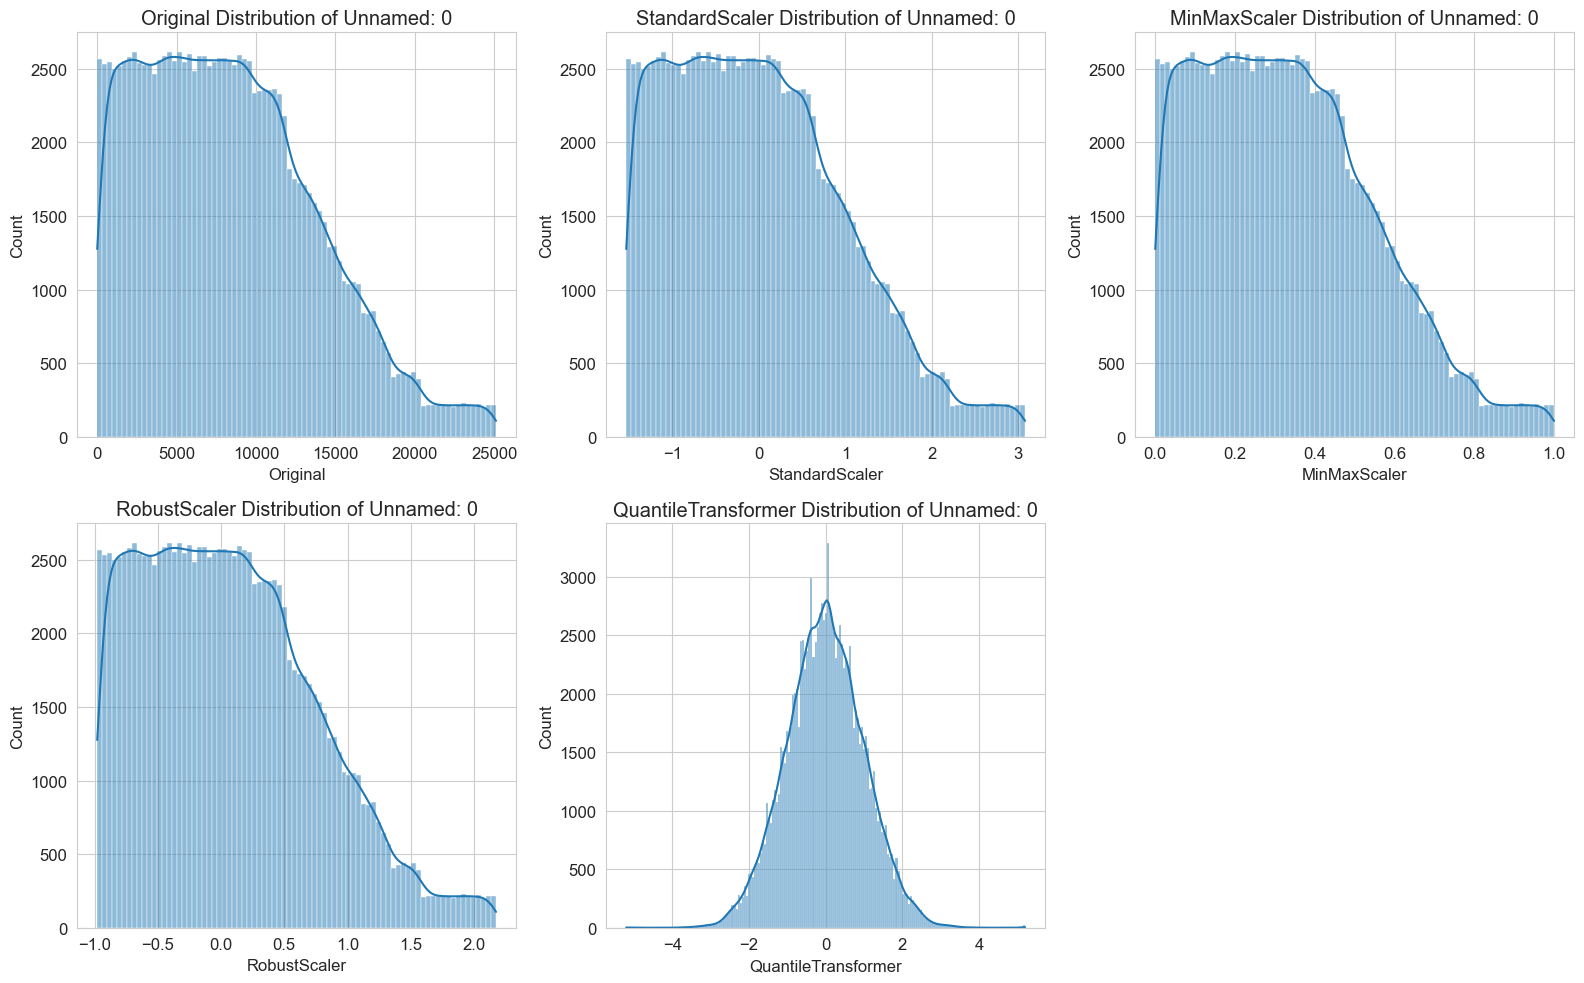

In [82]:
plt.figure(figsize=(16, 10))
for i, method in enumerate(scaling_comparison.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(scaling_comparison[method], kde=True)
    plt.title(f'{method} Distribution of {sample_feature}')
plt.tight_layout()
plt.show()

In [83]:
X_scaled = X_standard.copy()


In [84]:
# Assuming X_reduced is your feature set, and y is your target (Sales)
correlations = X_reduced.corrwith(y).abs().sort_values(ascending=False)
top_correlated = correlations.head(10)  # Top 10 most correlated features


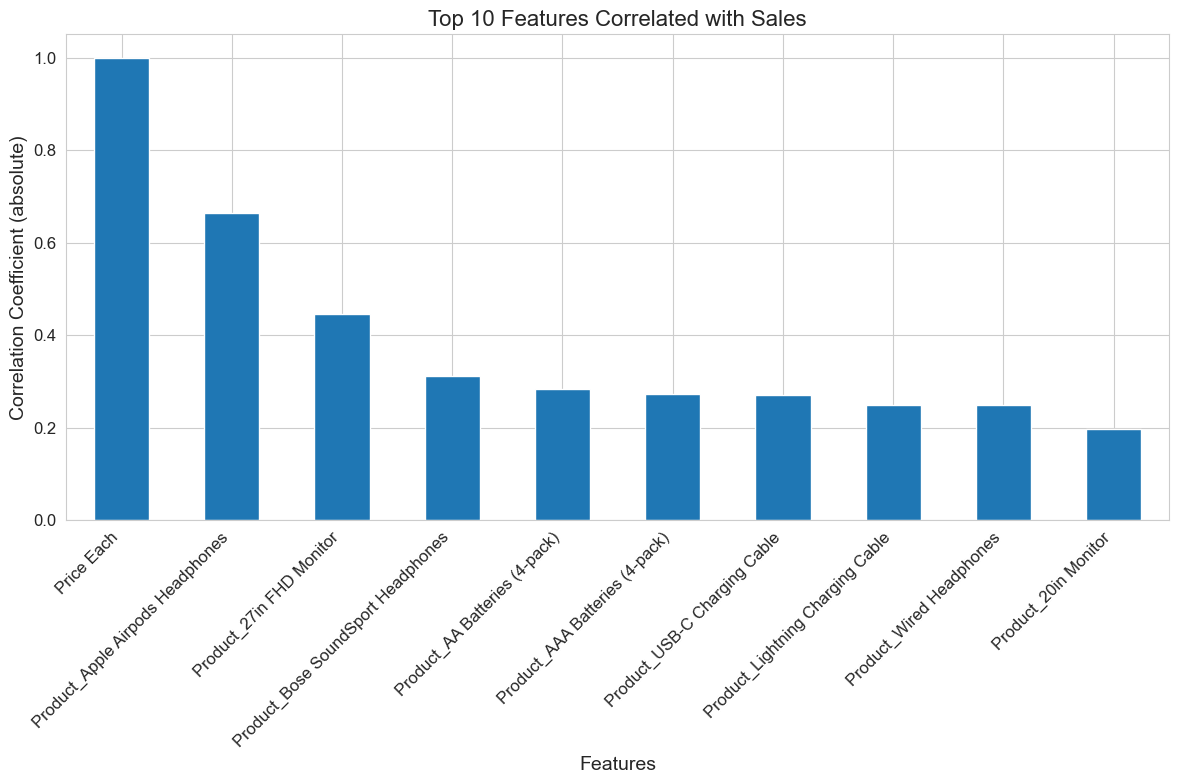

In [85]:
plt.figure(figsize=(12, 8))
top_correlated.plot(kind='bar')
plt.title('Top 10 Features Correlated with Sales', fontsize=16)
plt.ylabel('Correlation Coefficient (absolute)', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

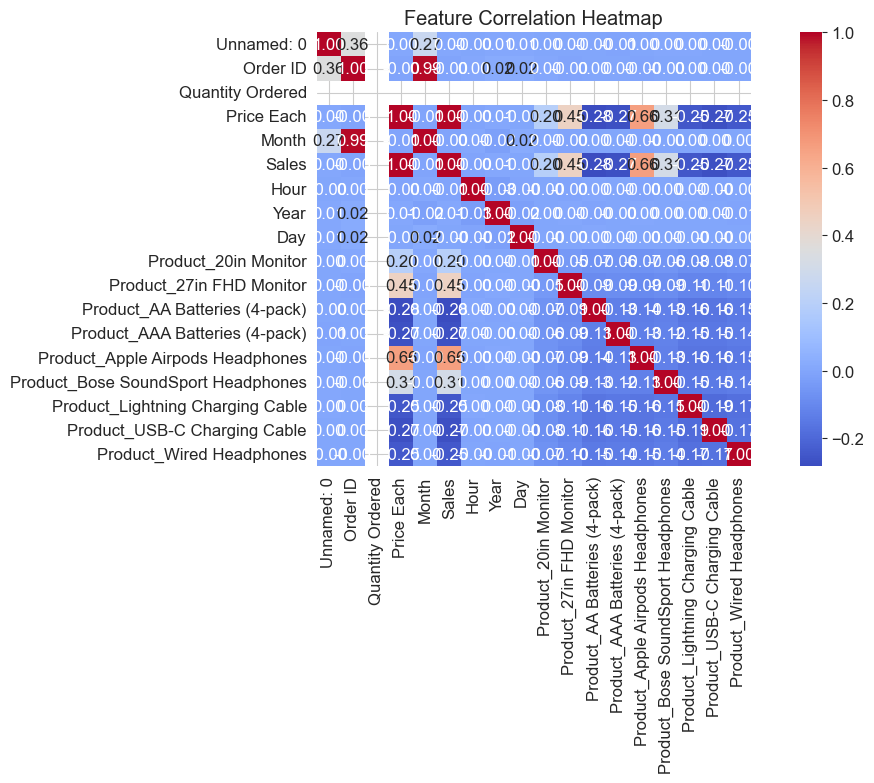

In [86]:
# Select numerical columns
numerical_cols = df_scaled.select_dtypes(include='number').columns

# Compute correlation
corr_matrix = df_scaled[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


In [87]:
df_clean.to_csv("C:\\Users\\admin\\Downloads\\Sales_data_clean.csv", index=False)
